In [2]:
# pandas로 csv파일 불러오기 
# 제일 첫번째 데이터 불러오기기
import pandas as pd 
df = pd.read_csv("renttherunway_data.csv")
print(df.head(1)) 

   fit  user_id bust size  item_id  weight  rating rented for  \
0  fit   420272       34d  2260466  137lbs    10.0   vacation   

                                         review_text  body type  \
0  An adorable romper! Belt and zipper were a lit...  hourglass   

         review_summary category height  size   age     review_date  
0  So many compliments!   romper  5' 8"    14  28.0  April 20, 2016  


In [3]:
# 전체 데이터 중에서 결측치 확인
print(df.isnull().sum())

fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating               82
rented for           10
review_text          68
body type         14637
review_summary      347
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64


In [4]:
# 필요 없는 컬럼 제거
df.drop(columns=['user_id', 'bust size', 'rented for', 'review_text', 'review_summary', 'review_date'], inplace=True)
print(df.isnull().sum())
 

fit              0
item_id          0
weight       29982
rating          82
body type    14637
category         0
height         677
size             0
age            960
dtype: int64


In [5]:
# weight 
# weight 타입 확인
print(df['weight'].dtype)
# weight 데이터 고유값 확인
print(df['weight'].unique())
# #문자열 제거 후 실수로 변환
df['weight'] = df['weight'].str.replace('lbs', '').astype(float)
# ibs를 kg로 변환
df['weight_kg'] = df['weight'] *0.453592
# # null값은 평균으로 채우기
# df['weight_kg'] = df['weight_kg'].fillna(df['weight_kg'].mean())
#소수 둘째 자리까지 반올림
df['weight_kg'] = df['weight_kg'].round(2)
# weight_kg 컬럼의 null 값을 0으로 채우기
df['weight_kg'] = df['weight_kg'].fillna(0)

print(df['weight_kg'].unique())

object
['137lbs' '132lbs' nan '135lbs' '145lbs' '138lbs' '112lbs' '118lbs'
 '114lbs' '120lbs' '142lbs' '140lbs' '170lbs' '143lbs' '115lbs' '123lbs'
 '122lbs' '165lbs' '130lbs' '155lbs' '105lbs' '190lbs' '150lbs' '136lbs'
 '128lbs' '174lbs' '125lbs' '110lbs' '160lbs' '180lbs' '175lbs' '134lbs'
 '109lbs' '124lbs' '250lbs' '195lbs' '231lbs' '161lbs' '126lbs' '210lbs'
 '215lbs' '220lbs' '163lbs' '106lbs' '178lbs' '157lbs' '185lbs' '108lbs'
 '200lbs' '92lbs' '117lbs' '146lbs' '116lbs' '141lbs' '103lbs' '121lbs'
 '127lbs' '111lbs' '152lbs' '172lbs' '107lbs' '133lbs' '248lbs' '154lbs'
 '153lbs' '131lbs' '156lbs' '129lbs' '186lbs' '100lbs' '113lbs' '148lbs'
 '119lbs' '166lbs' '144lbs' '158lbs' '95lbs' '234lbs' '139lbs' '230lbs'
 '184lbs' '102lbs' '205lbs' '168lbs' '162lbs' '147lbs' '98lbs' '225lbs'
 '204lbs' '89lbs' '159lbs' '96lbs' '176lbs' '212lbs' '149lbs' '240lbs'
 '198lbs' '169lbs' '260lbs' '196lbs' '104lbs' '173lbs' '179lbs' '101lbs'
 '239lbs' '182lbs' '151lbs' '164lbs' '218lbs' '171lbs'

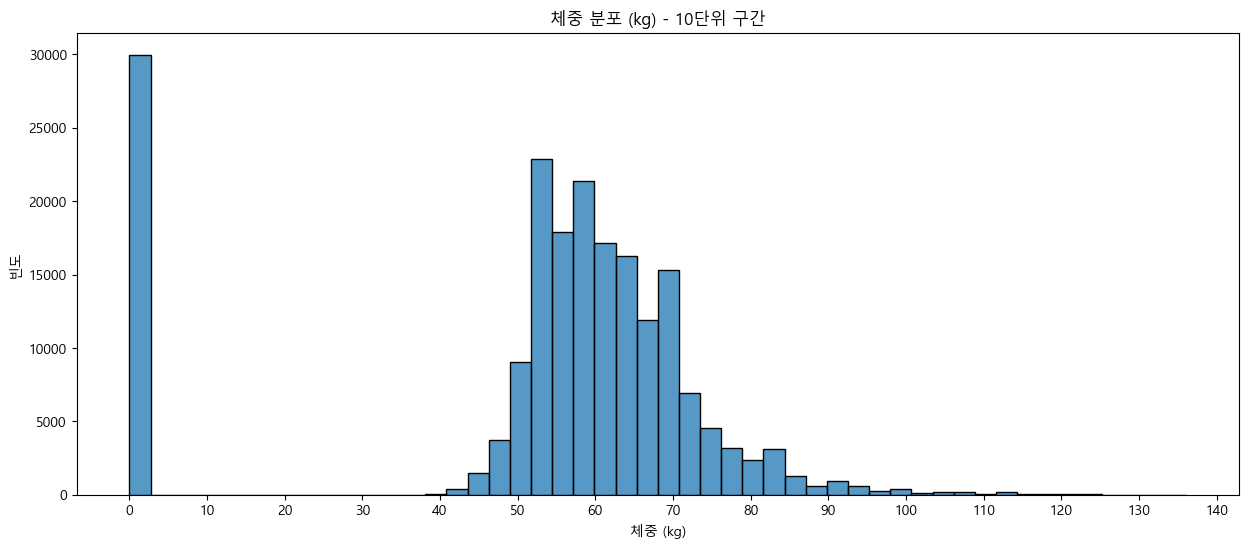


체중 통계 정보 (kg):
count    192544.000000
mean         52.615317
std          24.369903
min           0.000000
25%          52.160000
50%          58.970000
75%          65.770000
max         136.080000
Name: weight_kg, dtype: float64


In [6]:
# weight 데이터 시각화 (10단위 구간)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
# 일반적인 윈도우 글꼴
plt.rcParams['font.family'] = 'Malgun Gothic'
#  -(마이너스)안 깨지기 위함
plt.rcParams['axes.unicode_minus'] = False

# 0이 아닌 값값 필터링
df_filtered = df[df['weight_kg'] != 0]

#너비 15, 높이 6인 그래프 
plt.figure(figsize=(15, 6))
# 그래프 막대 50개로 나타냄
sns.histplot(data=df, x='weight_kg', bins=50)  # bins를 50으로 증가
# 그래프 제목
plt.title('체중 분포 (kg) - 10단위 구간')
# x축 라벨 이름
plt.xlabel('체중 (kg)')
# y축 라벨 이름
plt.ylabel('빈도')
# x축 눈금을 10단위로 설정
plt.xticks(range(0, int(df['weight_kg'].max()) + 10, 10))  # x축 눈금을 10단위로 설정
# 그래프 보여주기
plt.show()

# 무게 통계 정보 출력
print("\n체중 통계 정보 (kg):")
# describe는 기초 통계값 출력
print(df['weight_kg'].describe())

In [7]:
#  fit컬럼의 null 값을 0으로 채우기
df['fit'] = df['fit'].fillna('0')
print(df['weight_kg'].unique())


[ 62.14  59.87   0.    61.23  65.77  62.6   50.8   53.52  51.71  54.43
  64.41  63.5   77.11  64.86  52.16  55.79  55.34  74.84  58.97  70.31
  47.63  86.18  68.04  61.69  58.06  78.93  56.7   49.9   72.57  81.65
  79.38  60.78  49.44  56.25 113.4   88.45 104.78  73.03  57.15  95.25
  97.52  99.79  73.94  48.08  80.74  71.21  83.91  48.99  90.72  41.73
  53.07  66.22  52.62  63.96  46.72  54.88  57.61  50.35  68.95  78.02
  48.53  60.33 112.49  69.85  69.4   59.42  70.76  58.51  84.37  45.36
  51.26  67.13  53.98  75.3   65.32  71.67  43.09 106.14  63.05 104.33
  83.46  46.27  92.99  76.2   73.48  66.68  44.45 102.06  92.53  40.37
  72.12  43.54  79.83  96.16  67.59 108.86  89.81  76.66 117.93  88.9
  47.17  78.47  81.19  45.81 108.41  82.55  68.49  74.39  98.88  77.56
 115.67  44.   122.47  84.82  40.82  90.26 106.59  87.54  87.09  85.73
  91.17 111.13  86.64  93.44  97.98  75.75  85.28  92.08  94.8  101.6
  80.29 120.2  125.19  99.34  44.91  95.71  88.   127.01  93.89  94.35
 129.27 

C:\Users\user\AppData\Local\Temp\ipykernel_19256\4059938000.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_fit_filtered, x='fit', order=df_fit_filtered['fit'].value_counts().index, palette='pastel')


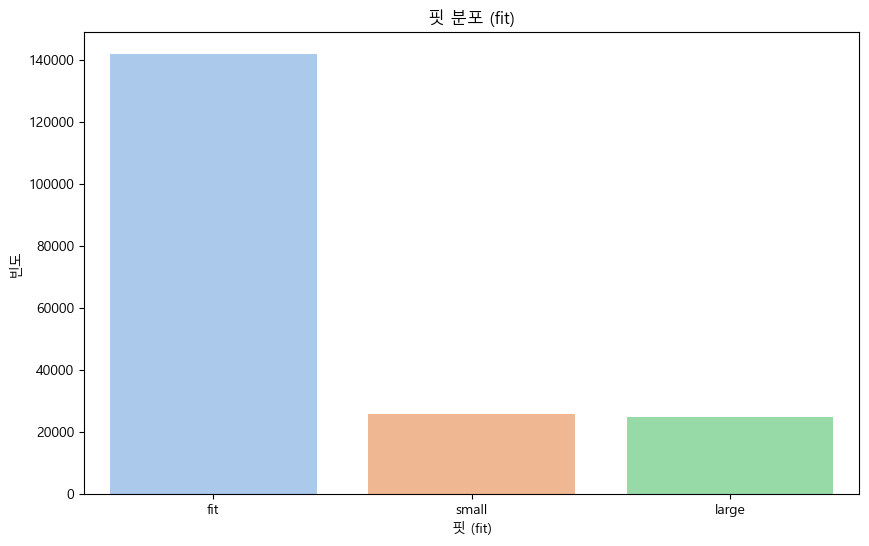


핏 (fit) 데이터 분포:
fit
fit      142058
small     25779
large     24707
Name: count, dtype: int64


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/user/Downloads/renttherunway_data.csv")

# 한글 폰트 설정
# 일반적인 윈도우 글꼴
plt.rcParams['font.family'] = 'Malgun Gothic'
#  -(마이너스)안 깨지기 위함
plt.rcParams['axes.unicode_minus'] = False

# 0이 아닌 값 필터링
df_fit_filtered = df[df['fit'] != '0']

# 너비 10, 높이 6인 그래프
plt.figure(figsize=(10, 6))
sns.countplot(data=df_fit_filtered, x='fit', order=df_fit_filtered['fit'].value_counts().index, palette='pastel')
# 그래프 제목
plt.title('핏 분포 (fit)')
# x축 라벨 이름
plt.xlabel('핏 (fit)')
# y축 라벨 이름
plt.ylabel('빈도')
# 그래프 보여주기
plt.show()

#핏 통계 정보 출력
print("\n핏 (fit) 데이터 분포:")
print(df['fit'].value_counts())


In [10]:
# rating 컬럼의 null 값을 0으로 채우기
df['rating'] = df['rating'].fillna(0)

# rating을 int로 변환
df['rating'] = df['rating'].astype(int)

# 점수 변환
rating_map = {
    6: 1,
    7: 2,
    8: 3,
    9: 4,
    10: 5
}
df['rating_mapped'] = df['rating'].replace(rating_map)
print(df['rating'].unique())

[10  8  4  6  2  0]


C:\Users\user\AppData\Local\Temp\ipykernel_19256\1677772148.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_rating_filtered, x='rating_mapped', palette='pastel')


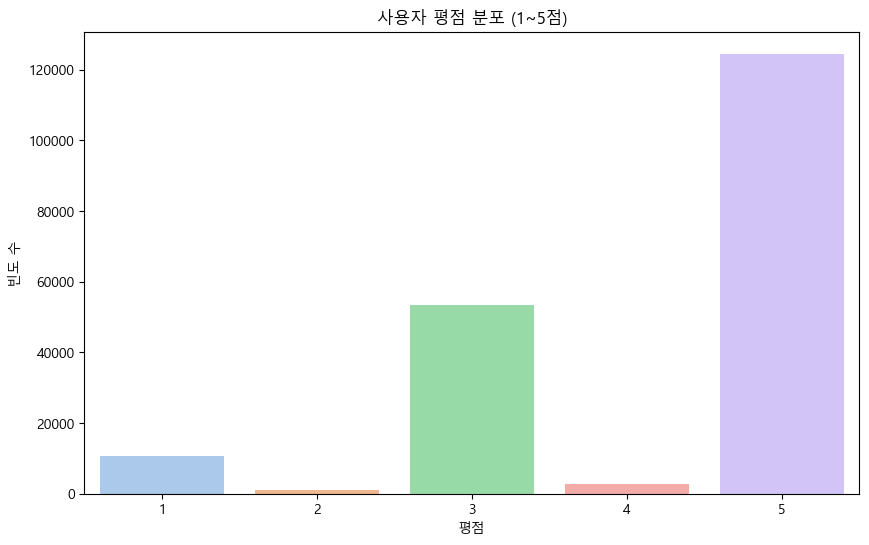


변환된 평점 분포:
rating_mapped
0        82
1     10697
2      1046
3     53391
4      2791
5    124537
Name: count, dtype: int64


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/user/Downloads/renttherunway_data.csv")

# 한글 폰트 설정
# 일반적인 윈도우 글꼴
plt.rcParams['font.family'] = 'Malgun Gothic'
#  -(마이너스)안 깨지기 위함
plt.rcParams['axes.unicode_minus'] = False

# rating 컬럼의 null 값을 0으로 채우기
df['rating'] = df['rating'].fillna(0)

# rating을 int로 변환
df['rating'] = df['rating'].astype(int)

# 점수 변환환
rating_map = {
    6: 1,
    7: 2,
    8: 3,
    9: 4,
    10: 5
}
df['rating_mapped'] = df['rating'].replace(rating_map)

# 0이 아닌 값 필터링
df_rating_filtered = df[df['rating_mapped'] != 0]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_rating_filtered, x='rating_mapped', palette='pastel')
plt.title('사용자 평점 분포 (1~5점)')
plt.xlabel('평점')
plt.ylabel('빈도 수')
plt.show()

#점수 통계 출력력
print("\n변환된 평점 분포:")
print(df['rating_mapped'].value_counts().sort_index())


In [ ]:
# height 컬럼의 null 값을 0으로 채우기
df['height'] = df['height'].fillna("0' 0")

# height cm로 변환
def height_to_cm(height_str):
    match = re.match(r"(\d+)' (\d+)", height_str)
    if match:
        feet = int(match.group(1))
        inches = int(match.group(2))
        return round((feet * 12 + inches) * 2.54, 2)
    else:
        return 0.0  # 변환 실패 시 0으로

df['height_cm'] = df['height'].apply(height_to_cm)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/user/Downloads/renttherunway_data.csv")

# 한글 폰트 설정
# 일반적인 윈도우 글꼴
plt.rcParams['font.family'] = 'Malgun Gothic'
#  -(마이너스)안 깨지기 위함
plt.rcParams['axes.unicode_minus'] = False

# height 컬럼의 null 값을 0으로 채우기
df['height'] = df['height'].fillna("0' 0")

# height cm로 변환
def height_to_cm(height_str):
    match = re.match(r"(\d+)' (\d+)", height_str)
    if match:
        feet = int(match.group(1))
        inches = int(match.group(2))
        return round((feet * 12 + inches) * 2.54, 2)
    else:
        return 0.0  # 변환 실패 시 0으로

df['height_cm'] = df['height'].apply(height_to_cm)

# 0이 아닌 값 필터링
df_height_filtered = df[df['height_cm'] != 0]

#
plt.figure(figsize=(15, 6))
sns.histplot(data=df_height_filtered, x='height_cm', bins=40, color='skyblue')
plt.title('신장 분포 (cm)')
plt.xlabel('신장 (cm)')
plt.ylabel('빈도')
plt.xticks(range(130, int(df_height_filtered['height_cm'].max()) + 5, 5))
plt.show()

#통계 정보 출력 (소수점 둘째 자리까지)
print("\n신장 통계 정보 (cm):")
print(df['height_cm'].describe().round(2))


In [ ]:
# body type 컬럼의 null 값을 0으로 채우기
df['body type'] = df['body type'].fillna('0')

# 0이 아닌 값 필터링
df_body_type_filtered = df[df['body type'] != '0']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/user/Downloads/renttherunway_data.csv")

# 한글 폰트 설정
# 일반적인 윈도우 글꼴
plt.rcParams['font.family'] = 'Malgun Gothic'
#  -(마이너스)안 깨지기 위함
plt.rcParams['axes.unicode_minus'] = False

# body type 컬럼의 null 값을 0으로 채우기
df['body type'] = df['body type'].fillna('0')

# 0이 아닌 값 필터링
df_body_type_filtered = df[df['body type'] != '0']

# 
plt.figure(figsize=(10, 6))
sns.countplot(data=df_body_type_filtered, x='body type', order=df_body_type_filtered['body type'].value_counts().index, palette='Set2')
plt.title('체형(body type) 분포')
plt.xlabel('체형(body type)')
plt.ylabel('빈도')
plt.show()

# 통계 출력
print("\nbody type 값별 개수:")
print(df['body type'].value_counts())

In [ ]:
# size 컬럼의 null 값을 0으로 채우기
df['size'] = df['size'].fillna('0')

# 0이 아닌 값 필터링
df_size_filtered = df[df['size'] != '0']

# 숫자형으로 변환
df_size_filtered['size'] = pd.to_numeric(df_size_filtered['size'], errors='coerce')

# 컬럼 오름차순 정렬
df_size_filtered = df_size_filtered.sort_values(by='size')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/user/Downloads/renttherunway_data.csv")

# 한글 폰트 설정
# 일반적인 윈도우 글꼴
plt.rcParams['font.family'] = 'Malgun Gothic'
#  -(마이너스)안 깨지기 위함
plt.rcParams['axes.unicode_minus'] = False

# size 컬럼의 null 값을 0으로 채우기
df['size'] = df['size'].fillna('0')

# 0이 아닌 값 필터링
df_size_filtered = df[df['size'] != '0']

# 숫자형으로 변환
df_size_filtered['size'] = pd.to_numeric(df_size_filtered['size'], errors='coerce')

# 컬럼 오름차순 정렬
df_size_filtered = df_size_filtered.sort_values(by='size')

# 
plt.figure(figsize=(10, 6))
sns.countplot(data=df_size_filtered, x='size', order=sorted(df_size_filtered['size'].unique()), palette='Set2')
plt.title('사이즈(size) 분포')
plt.xlabel('사이즈(size)')
plt.ylabel('빈도')
plt.show()

# 통계 출력
print("\nsize 값별 개수:")
print(df_size_filtered['size'].value_counts().sort_index())

In [ ]:
# null 평균값으로 대체
df['age'] = df['age'].fillna(df['age'].mean())

# age_group 생성
bins = [0, 19, 29, 39, 49, 59, 100]
labels = ['10대', '20대', '30대', '40대', '50대', '60대 이상']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [ ]:
# 나이 전체체
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/user/Downloads/renttherunway_data.csv")

# 한글 폰트 설정
# 일반적인 윈도우 글꼴
plt.rcParams['font.family'] = 'Malgun Gothic'
#  -(마이너스)안 깨지기 위함
plt.rcParams['axes.unicode_minus'] = False

#  결측치를 0으로 채우고 정수형으로 변환
df['age'] = df['age'].fillna(0)
df['age'] = df['age'].round().astype(int)

# 
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='age', bins=50, color='lightcoral')
plt.title('나이 분포')
plt.xlabel('나이')
plt.ylabel('빈도')
plt.xticks(range(0, int(df['age'].max()) + 5, 5))
plt.tight_layout()
plt.show()

# 출력
print("\n전체 나이 값 분포:")
print(df['age'].value_counts().sort_index())

In [ ]:
# 나이 평균균
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/user/Downloads/renttherunway_data.csv")

# 한글 폰트 설정
# 일반적인 윈도우 글꼴
plt.rcParams['font.family'] = 'Malgun Gothic'
#  -(마이너스)안 깨지기 위함
plt.rcParams['axes.unicode_minus'] = False


# null 평균값으로 대체
df['age'] = df['age'].fillna(df['age'].mean())

# age_group 생성
bins = [0, 19, 29, 39, 49, 59, 100]
labels = ['10대', '20대', '30대', '40대', '50대', '60대 이상']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# 오름차순으로 정렬
age_order = ['10대', '20대', '30대', '40대', '50대', '60대 이상']  # 오름차순 순서 정의
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', order=age_order, palette='Set2')
plt.title('연령대(age_group) 분포')
plt.xlabel('연령대(age_group)')
plt.ylabel('빈도')
plt.show()

# 통계 출력
print("\nage_group 값별 개수:")
print(df['age_group'].value_counts().sort_index())


In [ ]:
# item_id 컬럼의 null 값을 0으로 채우기
df['item_id'] = df['item_id'].fillna('0')

# 0이 아닌 값 필터링
df_item_id_filtered = df[df['item_id'] != '0']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/user/Downloads/renttherunway_data.csv")

# 한글 폰트 설정
# 일반적인 윈도우 글꼴
plt.rcParams['font.family'] = 'Malgun Gothic'
#  -(마이너스)안 깨지기 위함
plt.rcParams['axes.unicode_minus'] = False

# item_id 컬럼의 null 값을 0으로 채우기
df['item_id'] = df['item_id'].fillna('0')

# 0이 아닌 값 필터링
df_item_id_filtered = df[df['item_id'] != '0']

# 
plt.figure(figsize=(10, 6))
sns.countplot(data=df_item_id_filtered, x='item_id', order=df_item_id_filtered['item_id'].value_counts().index, palette='Set2')
plt.title('아이템 아이디(item_id) 분포')
plt.xlabel('아이템 아이디(item_id)')
plt.ylabel('빈도')
plt.xticks(rotation=90)  # 아이템 아이디가 많을 경우, 라벨이 겹치지 않도록 회전
plt.show()

# 통계계 출력
print("\nitem_id 값별 개수:")
print(df['item_id'].value_counts().sort_index())
